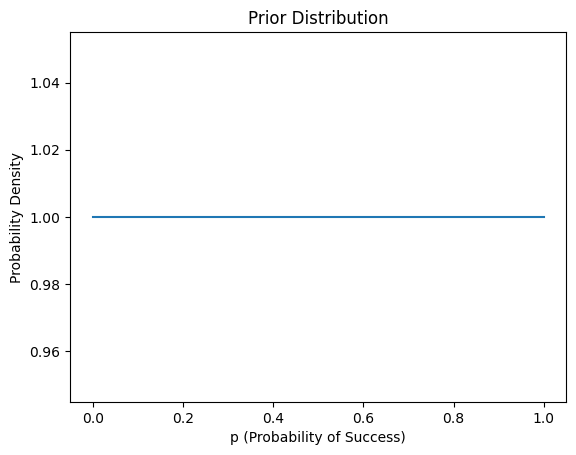

In [10]:
#Ryan Bendelson, Liam Booth, and Joe Thatcher Code
import numpy as np #Import numpy as np
from scipy.stats import binom
from scipy.integrate import trapezoid
#python -m pip install -U pip
#python -m pip install -U matplotlib
import matplotlib.pyplot as plt #Run above two comment lines in Anaconda Prompt before running this script

# Subdivision size for spaceof success probabilities
N = 1000

# Sample the space of success probabilities from 1/dp evenly spaced pieces of [0,1]
p_grid = np.linspace(0, 1, N)

# The prior distribution is uniform; so we define it as an array of 1's
prior = np.ones(1000)

# Plotting
## Instantiate a plot of the prior distribution (plt.plot(x-values,y-values))
plt.plot(p_grid, prior)
## Label axes and create title and display
plt.xlabel("p (Probability of Success)")
plt.ylabel("Probability Density")
plt.title("Prior Distribution")
## Display the plot!
plt.show()

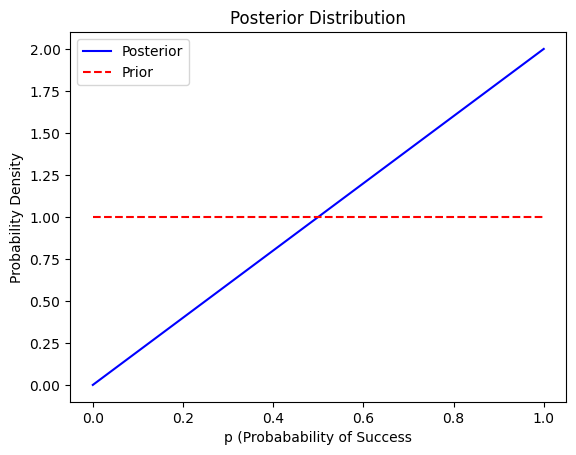

In [11]:
# Number of successes/heads for coin flip: change these values!
num_success_coin = 1
# Number of trials
num_trials_coin = 1

# Likelihoods: P(Data| Model(p))
# Here Data = {num_success, num_trials} and Model(p) is the binomial distribution
# with parameter p. The likelihood is a function of p.
likelihood_coin = binom.pmf(num_success_coin, n=num_trials_coin, p=p_grid)

# The posterior distribution is proportional to the prior distribution times the likelihood
posterior_coin_unnormalized = likelihood_coin * prior

# Normalize the posterior distribution so that the area under its curve is 1
# trapezoid(distribution, x-values) computes the area under the distribution
posterior = posterior_coin_unnormalized/trapezoid(posterior_coin_unnormalized, p_grid)

# Plotting
plt.plot(p_grid, posterior, label='Posterior', color='blue')
plt.plot(p_grid, prior, 'r--', label='Prior')
plt.xlabel('p (Probabability of Success')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution')
plt.legend()
plt.show()

In [12]:
def probability_in_range(distribution, grid, a, b):
    """
    Calculate the probability that a distribution lies between values a and b.

    Parameters:
    - distribution (np.array): The probability distribution (e.g., posterior).
    - grid (np.array): The corresponding grid values (e.g., p_grid).
    - a (float): Lower bound of the range.
    - b (float): Upper bound of the range.

    Returns:
    - float: Probability that the distribution lies between a and b.
    """
    in_range = (grid >= a) & (grid <= b)
    probability = trapezoid(distribution[in_range], grid[in_range])
    return probability

print("Prior probability:", probability_in_range(prior, p_grid, 1/2 - 0.01, 1/2 + 0.01)) # compute the probability of p living in [1/2 - 0.01, 1/2 + 0.01] in the prior distribution

print("Posterior probability:", probability_in_range(posterior, p_grid, 1/2 - 0.01, 1/2 + 0.01)) # compute the probability of p living in [1/2 - 0.01, 1/2 + 0.01] in the posterior distribution

Prior probability: 0.01901901901901898
Posterior probability: 0.01901901901901898


In [13]:
'''
Write down an explicit formula for the posterior distribution of a coin toss, starting with a uniform prior, given that there is 1 head and 1 coin flip
'''
print("\n")
print("The explicit formula for the posterior distribution of a coin toss, starting with a uniform prior and given that there is 1 head and 1 coin flip, is \"y = 2x\" where \"y\" is the posterior probability, \"x\" is the prior probability, and 2 is the constant coefficient.")



The explicit formula for the posterior distribution of a coin toss, starting with a uniform prior and given that there is 1 head and 1 coin flip, is "y = 2x" where "y" is the posterior probability, "x" is the prior probability, and 2 is the constant coefficient.


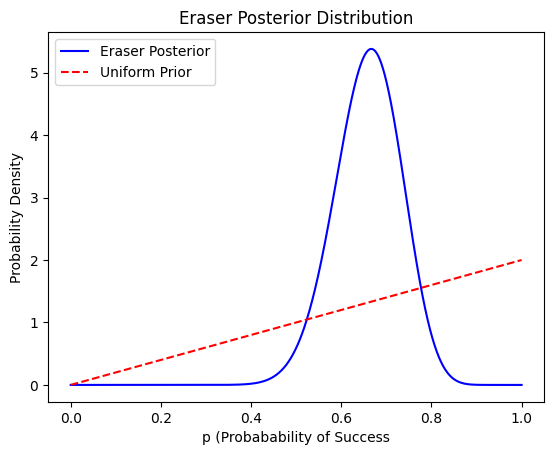

In [14]:
'''
For the eraser: after looking at the posterior distribution assuming a uniform prior, try using the posterior distribution from your coin flips as the new prior, what has changed?
'''
uPrior = posterior

# Number of successes/heads for coin flip: change these values!
num_success_coin = 25 #Times eraser lands white side up
# Number of trials
num_trials_coin = 38 #Times eraser was flipped

# Likelihoods: P(Data| Model(p))
# Here Data = {num_success, num_trials} and Model(p) is the binomial distribution
# with parameter p. The likelihood is a function of p.
likelihood_coin = binom.pmf(num_success_coin, n=num_trials_coin, p=p_grid)

# The posterior distribution is proportional to the prior distribution times the likelihood
posterior_coin_unnormalized = likelihood_coin * uPrior

# Normalize the posterior distribution so that the area under its curve is 1
# trapezoid(distribution, x-values) computes the area under the distribution
posterior = posterior_coin_unnormalized/trapezoid(posterior_coin_unnormalized, p_grid)

# Plotting
plt.plot(p_grid, posterior, label='Eraser Posterior', color='blue')
plt.plot(p_grid, uPrior, 'r--', label='Uniform Prior')
plt.xlabel('p (Probabability of Success')
plt.ylabel('Probability Density')
plt.title('Eraser Posterior Distribution')
plt.legend()
plt.show()

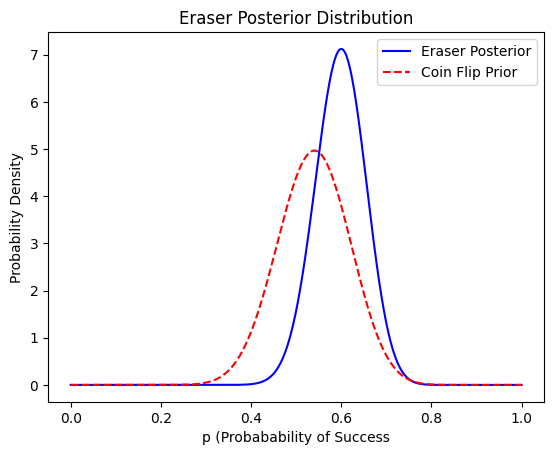



The non-uniform prior plot skews less to the right and has a higher peak.


In [15]:
# Number of successes/heads for coin flip: change these values!
num_success_coin = 19 #Times coin flip results in heads
# Number of trials
num_trials_coin = 36 #Times coin was flipped

# Likelihoods: P(Data| Model(p))
# Here Data = {num_success, num_trials} and Model(p) is the binomial distribution
# with parameter p. The likelihood is a function of p.
likelihood_coin = binom.pmf(num_success_coin, n=num_trials_coin, p=p_grid)

# The posterior distribution is proportional to the prior distribution times the likelihood
posterior_coin_unnormalized = likelihood_coin * uPrior

# Normalize the posterior distribution so that the area under its curve is 1
# trapezoid(distribution, x-values) computes the area under the distribution
cPrior = posterior_coin_unnormalized/trapezoid(posterior_coin_unnormalized, p_grid)

# Number of successes/heads for coin flip: change these values!
num_success_coin = 25 #Times eraser lands white side up
# Number of trials
num_trials_coin = 38 #Times eraser was flipped

# Likelihoods: P(Data| Model(p))
# Here Data = {num_success, num_trials} and Model(p) is the binomial distribution
# with parameter p. The likelihood is a function of p.
likelihood_coin = binom.pmf(num_success_coin, n=num_trials_coin, p=p_grid)

# The posterior distribution is proportional to the prior distribution times the likelihood
posterior_coin_unnormalized = likelihood_coin * cPrior

# Normalize the posterior distribution so that the area under its curve is 1
# trapezoid(distribution, x-values) computes the area under the distribution
posterior = posterior_coin_unnormalized/trapezoid(posterior_coin_unnormalized, p_grid)

# Plotting
plt.plot(p_grid, posterior, label='Eraser Posterior', color='blue')
plt.plot(p_grid, cPrior, 'r--', label='Coin Flip Prior')
plt.xlabel('p (Probabability of Success')
plt.ylabel('Probability Density')
plt.title('Eraser Posterior Distribution')
plt.legend()
plt.show()

print("\n\nThe non-uniform prior plot skews less to the right and has a higher peak.")

In [16]:
'''
For the eraser: for the posterior distribution (starting with a uniform prior), find "a" and "b" such that the probability that "p" is between "a" and "b" (inclusive) is approximately 0.95
'''
# Number of successes/heads for coin flip: change these values!
num_success_coin = 25 #Times eraser lands white side up
# Number of trials
num_trials_coin = 38 #Times eraser was flipped

# Likelihoods: P(Data| Model(p))
# Here Data = {num_success, num_trials} and Model(p) is the binomial distribution
# with parameter p. The likelihood is a function of p.
likelihood_coin = binom.pmf(num_success_coin, n=num_trials_coin, p=p_grid)

# The posterior distribution is proportional to the prior distribution times the likelihood
posterior_coin_unnormalized = likelihood_coin * uPrior

# Normalize the posterior distribution so that the area under its curve is 1
# trapezoid(distribution, x-values) computes the area under the distribution
posterior = posterior_coin_unnormalized/trapezoid(posterior_coin_unnormalized, p_grid)

print("\n")
print("Prior probability:", probability_in_range(prior, p_grid, 1/2 - 0.01, 1/2 + 0.01)) # compute the probability of p living in [1/2 - 0.01, 1/2 + 0.01] in the prior distribution

print("Posterior probability:", probability_in_range(posterior, p_grid, 1/2 - 0.01, 1/2 + 0.01)) # compute the probability of p living in [1/2 - 0.01, 1/2 + 0.01] in the posterior distribution

#Find how far the boundaries must be from 1/2 to the nearest hundredth
print("\nFinding hundredths place\n")
boundDiff = 0.01
while(probability_in_range(posterior, p_grid, 1/2 - boundDiff, 1/2 + boundDiff) < 0.95):
    print("boundDiff:", round(boundDiff, 2))
    print("probability_in_range:", probability_in_range(posterior, p_grid, 1/2 - boundDiff, 1/2 + boundDiff))
    boundDiff = boundDiff + 0.01

#Find how far the boundaries must be from 1/2 to the nearest thousandth
print("\nFinding thousandths place\n")
boundDiff = boundDiff - 0.01
while(probability_in_range(posterior, p_grid, 1/2 - boundDiff, 1/2 + boundDiff) < 0.95):
    print("boundDiff:", round(boundDiff, 3))
    print("probability_in_range:", probability_in_range(posterior, p_grid, 1/2 - boundDiff, 1/2 + boundDiff))
    boundDiff = boundDiff + 0.001

#Find and display the "a" and "b" boundaries to the nearest thousandth
print("\nSuccessful boundDiff:", round(boundDiff, 3))
print("Successful probability_in_range:", probability_in_range(posterior, p_grid, 1/2 - boundDiff, 1/2 + boundDiff))
aBound = 1/2 - boundDiff
bBound = 1/2 + boundDiff
print("\"a\" and \"b\" respectively are", round(aBound, 3), "and", round(bBound, 3))


#Question 1: y = 2x
#Question 2: See the "Eraser Posterior Distribution" generated graphs/plots (The non-uniform prior plot skews less to the right and has a higher peak.)
#Question 3: 0.225 and 0.775



Prior probability: 0.01901901901901898
Posterior probability: 0.011328453216348906

Finding hundredths place

boundDiff: 0.01
probability_in_range: 0.011328453216348906
boundDiff: 0.02
probability_in_range: 0.023831901288550835
boundDiff: 0.03
probability_in_range: 0.03752302605529715
boundDiff: 0.04
probability_in_range: 0.05298501401897785
boundDiff: 0.05
probability_in_range: 0.0707670633219708
boundDiff: 0.06
probability_in_range: 0.09136939290314623
boundDiff: 0.07
probability_in_range: 0.11522606471146071
boundDiff: 0.08
probability_in_range: 0.142686022048588
boundDiff: 0.09
probability_in_range: 0.1739932492771598
boundDiff: 0.1
probability_in_range: 0.20926742684431715
boundDiff: 0.11
probability_in_range: 0.24848682998815508
boundDiff: 0.12
probability_in_range: 0.29147544129144753
boundDiff: 0.13
probability_in_range: 0.3378962672082899
boundDiff: 0.14
probability_in_range: 0.3872526337487382
boundDiff: 0.15
probability_in_range: 0.43889877639443764
boundDiff: 0.16
probabi